In [4]:
using Plots
using Statistics
using LinearAlgebra
using JSON

include("readclassjson.jl");

In [2]:
# ; wget http://ee263.stanford.edu/hw/espressodata.json -P data

## 10.1700 Optimal Espresso Preheating



In [5]:
espress = readclassjson("data/espressodata.json")

Dict{Any,Any} with 5 entries:
  "Te" => 95.0
  "n"  => 10
  "A"  => [-1.0 1.0 … 0.0 0.0; 33.33 -44.44 … 0.0 0.0; … ; 0.0 0.0 … -22.22 11.…
  "Tl" => 100.0
  "Ta" => 20.0

In [6]:
A = espress["A"]
n = espress["n"]

10

From the dynamics of the system, we can see that the hot water will transfer heat to the cup over time, before both cool due to the room temperature. The espresso will be kept hottest when the cup has peaked in temperature, which occurs at the point where the cup and water have the same temperature. There is no remaining heat difference for the water to transfer to the cup and both will cool after that point. To understand the dynamics of the system, we are given the LDS $\frac{d}{d t}(x(t)-20 \cdot \mathbf{1})=A(x(t)-20 \cdot \mathbf{1})$. Defining $\tilde{x}(t) = x(t)-20 \cdot \mathbf{1}$, we can rewrite this as $\dot{\tilde{x}}(t) = A \tilde{x}(t)$, the typical form for an LDS and one for which we know the solution.

Therefore we have solution $\tilde{x}(t) = e^{At}x(0)$ or equivalently,  $x(t)-20 \cdot \mathbf{1}=e^{At}(x(0)-20 \cdot \mathbf{1})$. At time P, when the cup temperature is maximized by the water preheating, $x(P)-20 \cdot \mathbf{1}=e^{AP}(x(0)-20 \cdot \mathbf{1})$.

Finally, we are actually interested in $x(P+15)$. Since we have discontinuity at P when the water is replaced by 95 degree espresso, we can view $x(P)$ as an $x(0)$ for this system and we have $x(P+15)-20 \cdot \mathbf{1} = e^{A\times15}(x(P)-20 \cdot \mathbf{1})$.

Therefore our search proceeds by taking in a value of P, calculating $x(P)$ from the formula $x(P)-20 \cdot \mathbf{1}=e^{AP}(x(0)-20 \cdot \mathbf{1})$, replacing the value of $x_1(P)=95$ to simulate the replacing of water with espresso, and calculating the vector $x(P+15)$ via $x(P+15)-20 \cdot \mathbf{1} = e^{A\times15}(x(P)-20 \cdot \mathbf{1})$. Finally, the first element of the vector $x(P+15)$, signifying the temperature of espresso at consumption. We run the procedure over a fine grid of possible P's to find the optimal length of time.

In [45]:
function consumption_temp(t)
    xp = (exp(A.*t) * (x0 .- 20)) .+ 20
    xp[1] = 95
    xp15 = (exp(A.*15) * (xp .- 20)) .+ 20
    return(xp15[1])
end

consumption_temp (generic function with 1 method)

In [38]:
x0 = [100 ; ones(10, 1).*20] 

11×1 Array{Float64,2}:
 100.0
  20.0
  20.0
  20.0
  20.0
  20.0
  20.0
  20.0
  20.0
  20.0
  20.0

In [51]:
t = range(1, step=0.01, stop=30)

1.0:0.01:30.0

In [62]:
temps = test.(t);

In [60]:
hottest_indx = sortperm(temps, rev=true)[1]

1013

In [63]:
t[hottest_indx]

11.12

In [61]:
temps[hottest_indx]

87.60201285020453

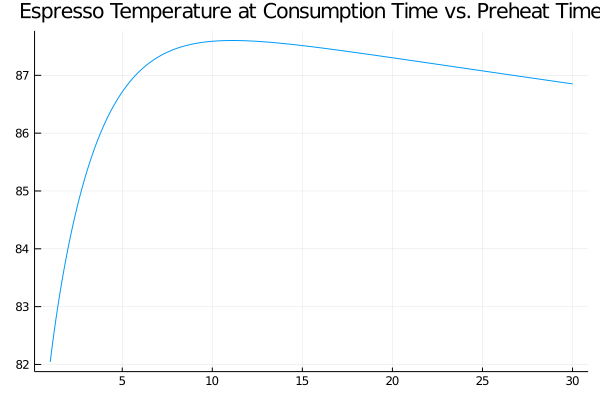

In [64]:
plot(t, temps, label=false)
title!("Espresso Temperature at Consumption Time vs. Preheat Time")

Therefore P= 11.1s, which gives an espresso temperature at consumption of 87.6 degrees 